In [21]:
class Pipeline:
    def __init__(self, steps: str) -> None:
        self.steps = steps

    def execute(self, data: str) -> str:
        result = data
        for step in self.steps:
            result = step.process(result)
        return result

class Step:
    def process(self, data: str) -> None:
        raise NotImplementedError("Subclasses must implement the 'process' method.")

class UpperCaseStep(Step):
    def process(self, data: str) -> str:
        return data.upper()

class ReverseStep(Step):
    def process(self, data: str) -> str:
        return data[::-1]

# Usage
steps = [UpperCaseStep(), ReverseStep()]
pipeline = Pipeline(steps)

data = "Hello, World!"
output = pipeline.execute(data)

print(output)


!DLROW ,OLLEH


## Bridge method

<div class="alert alert-block alert-info">
    <li>is an approach to refactor existing code</li>
    <li>allows us to separate the Implementation Specific Abstractions and Implementation Independent Abstractions</li>
    <li>Abstraction will get a reference to an object of the second hierarchy (Implementation)</li>
</div>

<div>
    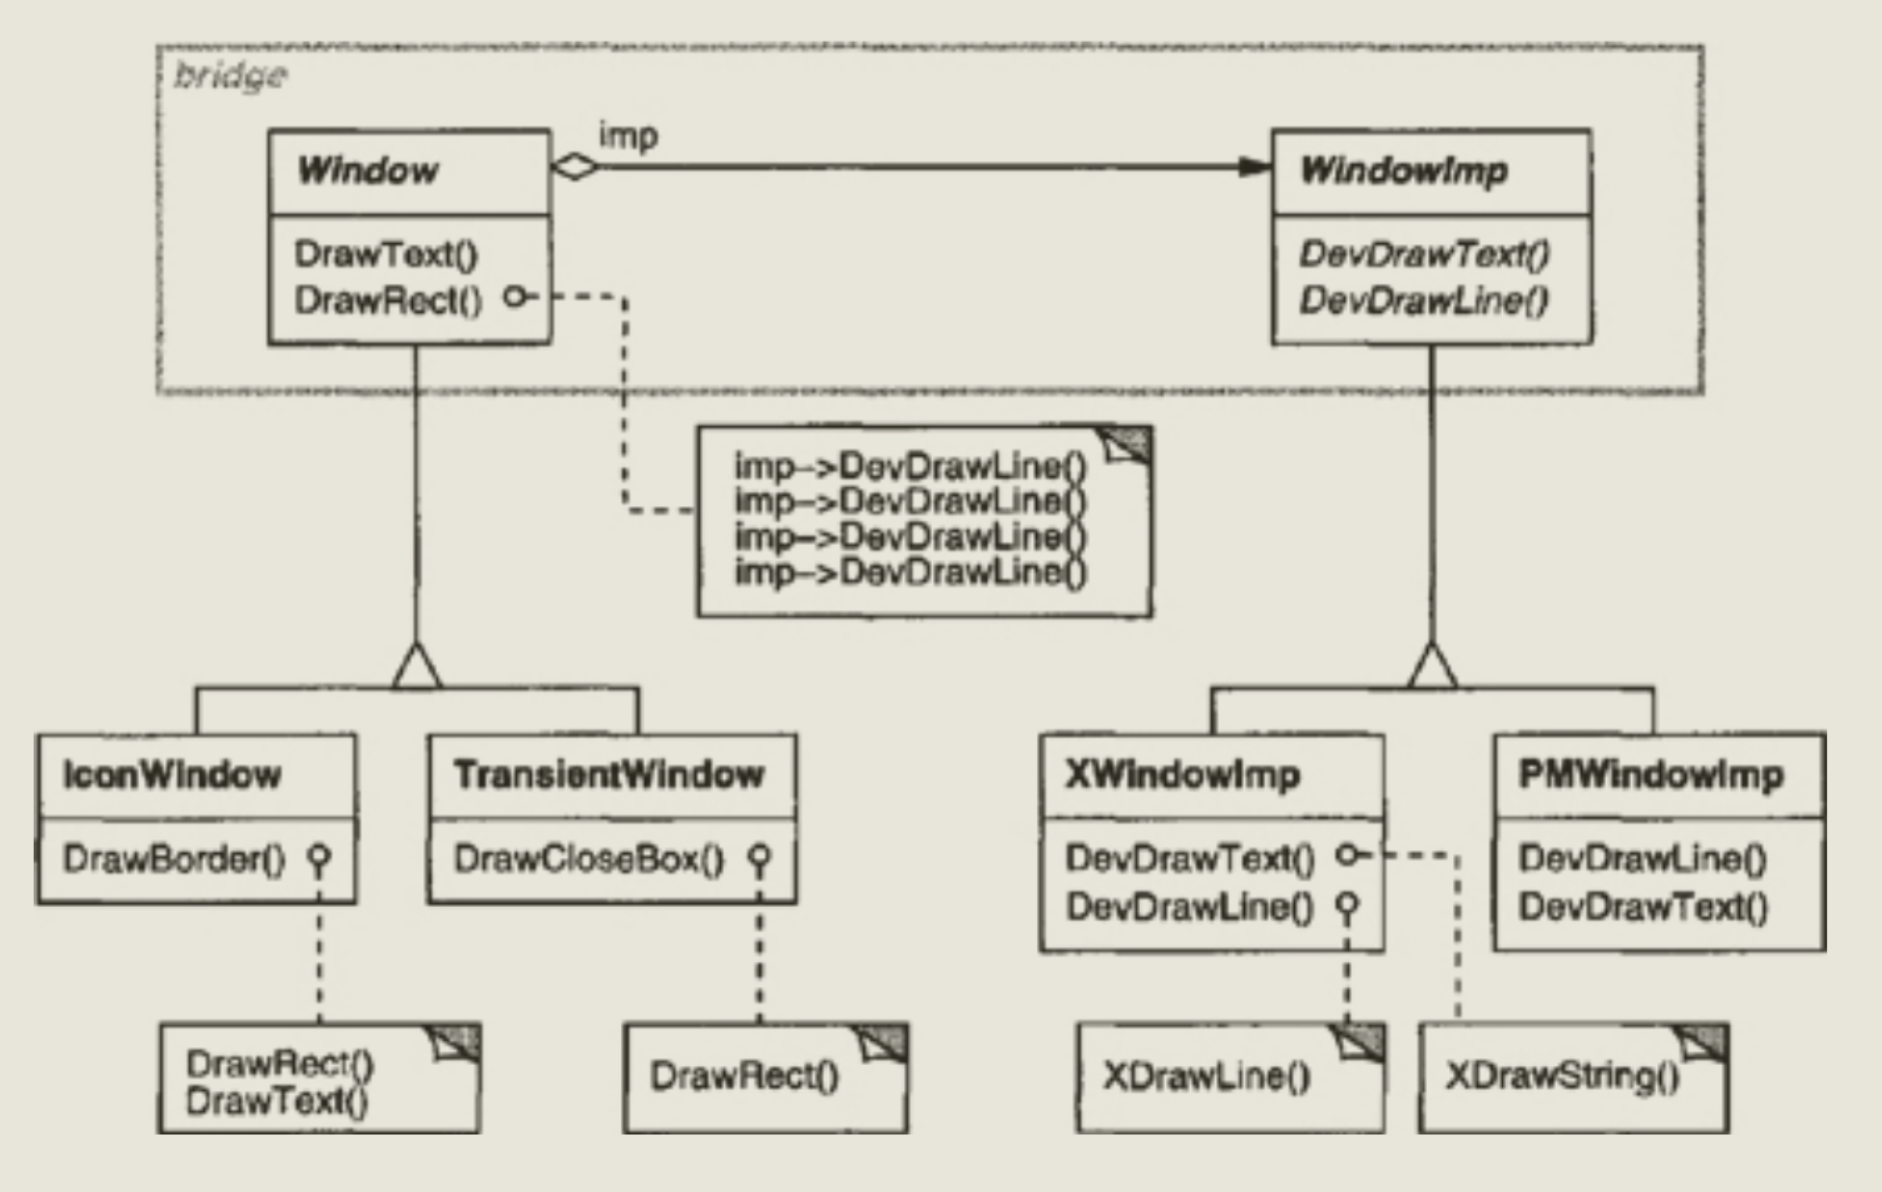
</div>

<p>Without Bridge method
<div>
    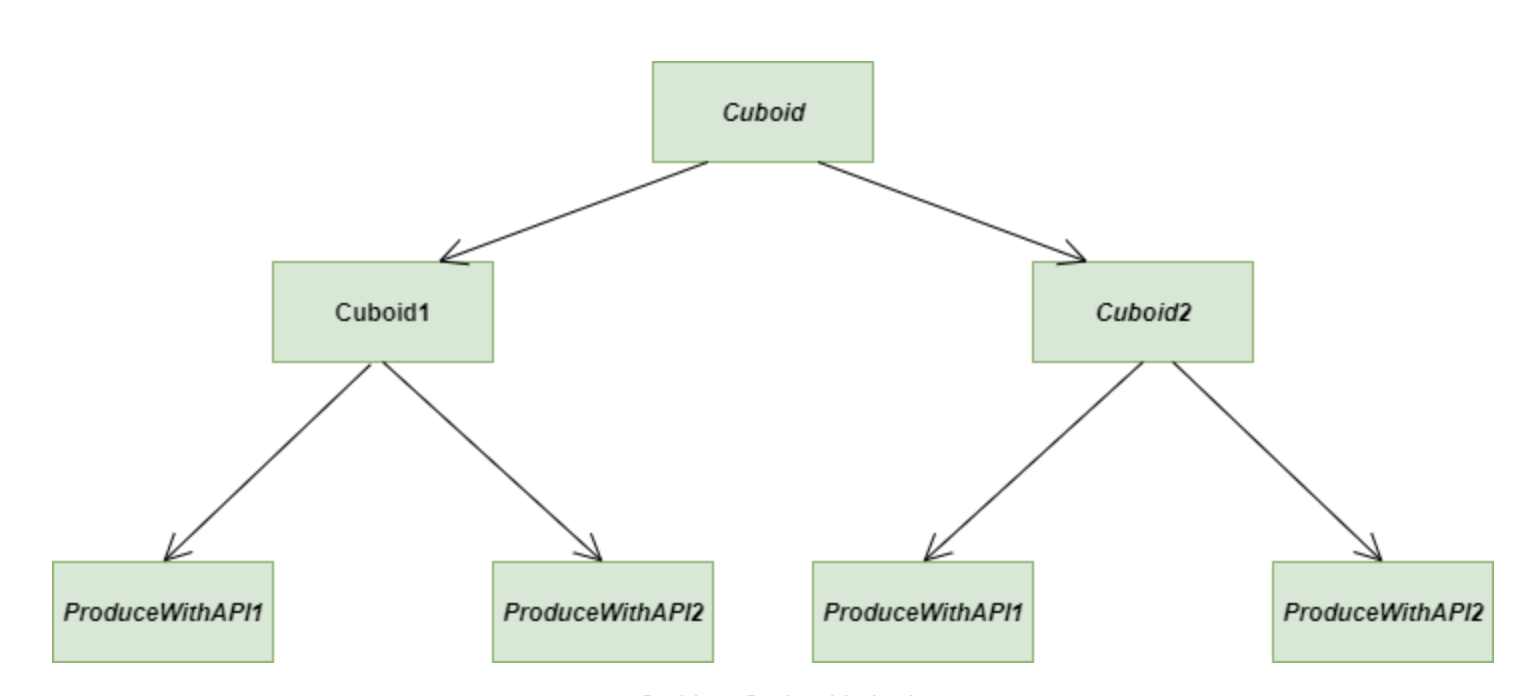
</div>

<p>With Bridge method
<div>
    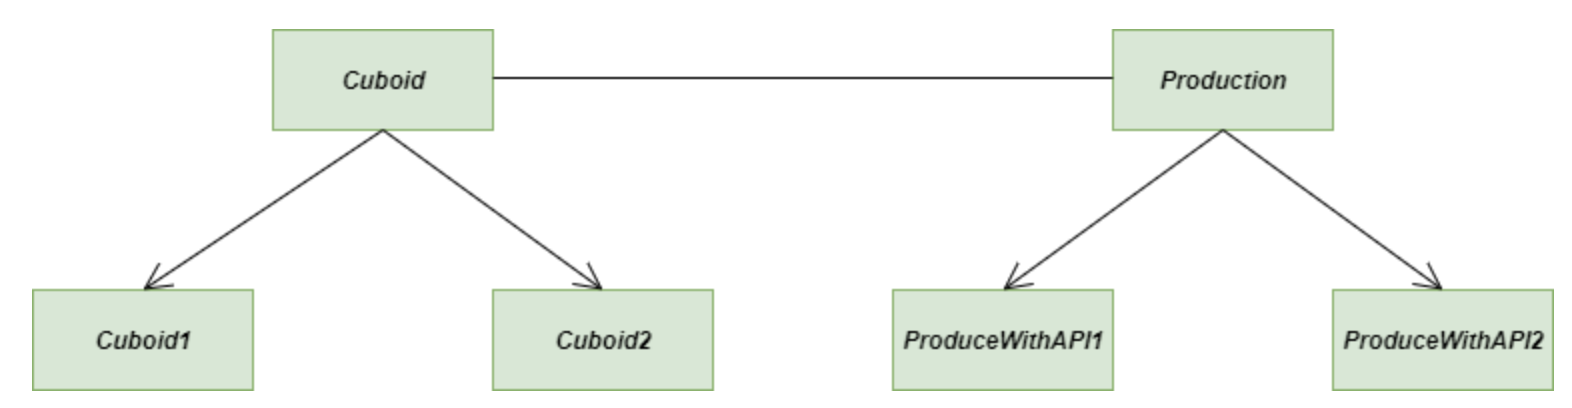
</div>

UML of Bridge method

<div>
    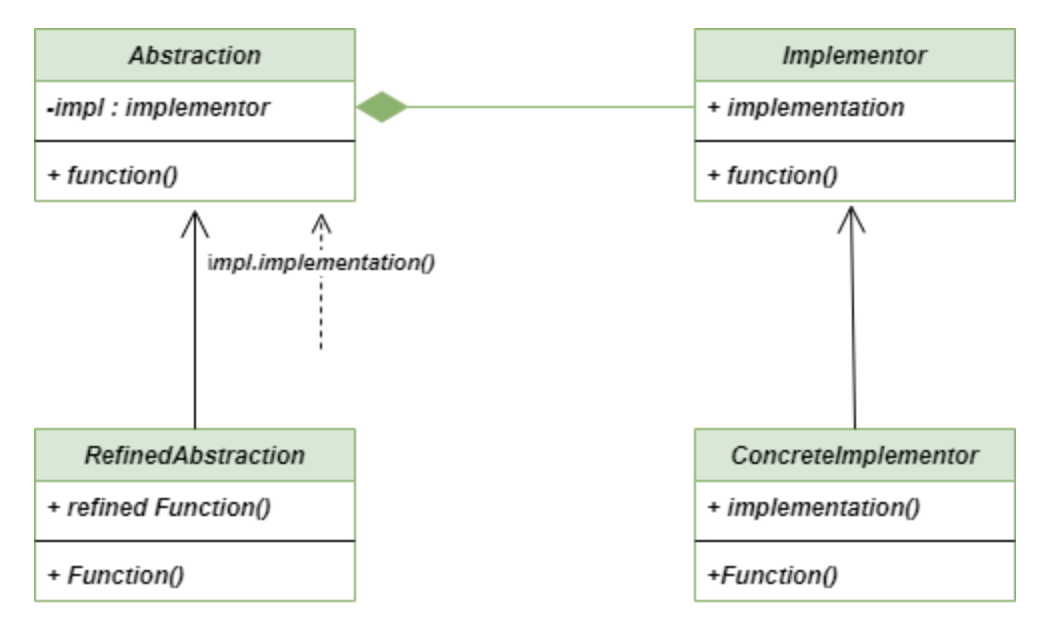
</div>

In [22]:
from typing import Union

class ProducingAPI1:
    """Implementation specific Abstraction"""
 
    def produceCuboid(self, length: int, breadth: int, height: int) -> None:
        print(f'API1 is producing Cuboid with length = {length}, '
              f' Breadth = {breadth} and Height = {height}')

class ProducingAPI2:
    """Implementation specific Abstraction"""
 
    def produceCuboid(self, length: int, breadth: int, height: int) -> None:
        print(f'API2 is producing Cuboid with length = {length}, '
              f' Breadth = {breadth} and Height = {height}')

class Cuboid:
    def __init__(self, 
                 length: int, 
                 breadth: int, 
                 height: int, 
                 producingAPI: Union[ProducingAPI1, ProducingAPI2]) -> None:
        """Initialize the necessary attributes
           Implementation independent Abstraction"""
        self._length = length
        self._breadth = breadth
        self._height = height
        self._producingAPI = producingAPI
 
    def produce(self) -> None:
        """Implementation specific Abstraction"""
        self._producingAPI.produceCuboid(self._length, self._breadth, self._height)
 
    def expand(self, times: float) -> None:
        """Implementation independent Abstraction"""
        self._length = self._length * times
        self._breadth = self._breadth * times
        self._height = self._height * times
 
 
"""Instantiate a cuboid and pass to it an
   object of ProducingAPIone"""
cuboid1 = Cuboid(1, 2, 3, ProducingAPI1())
cuboid1.produce()
 
cuboid2 = Cuboid(19, 19, 19, ProducingAPI2())
cuboid2.produce()
cuboid2.expand(3.0)
cuboid2.produce()


API1 is producing Cuboid with length = 1,  Breadth = 2 and Height = 3
API2 is producing Cuboid with length = 19,  Breadth = 19 and Height = 19
API2 is producing Cuboid with length = 57.0,  Breadth = 57.0 and Height = 57.0


## adapter (wrapper)

<div class="alert alert-block alert-info>">
    <li>(make incompatible objects adaptable to each other)</li>
    <li>convert the interface of a class into another interface client expects</li>
   
</div>

<div>
    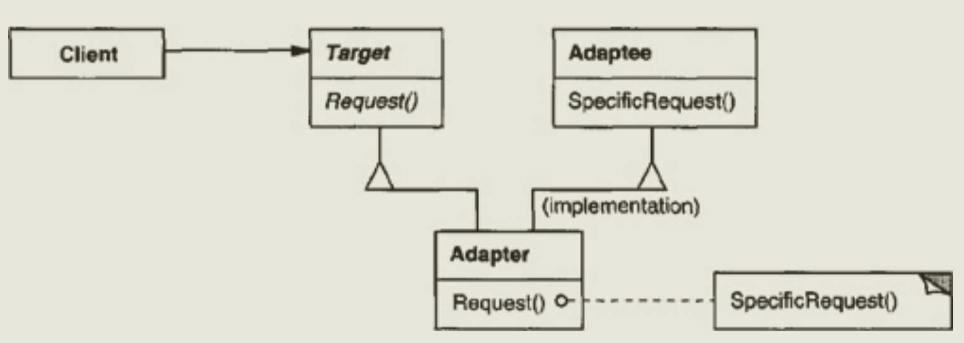
</div>

In [20]:
from typing import Callable, TypeVar
T = TypeVar("T")

class Dog:
    def __init__(self) -> None:
        self.name = "Stinky"
        
    def bark(self) -> str:
        return "woof!"
    
    
class Cat:
    def __init__(self, name: str, sound: str = "meow", noise_level: int=3) -> None:
        self.name = name
        self.sound = sound
        self.noise_level = noise_level
        
    def make_noise(self) -> str:
        return f"{self.sound} {'!' *self.noise_level}"
    
    def get_name(self):
        return  self.name
    
    
##############
class Adapter:
    """Adapts an object by replacing methods"""
    
    def __init__(self, obj: T, **adapted_methods: Callable):
        """set the adapted methods in the object dictionary"""
        self.obj = obj
        self.__dict__.update(adapted_methods)
        
    def __getattr__(self, attr):
        """non-adapted classes are passed to the object"""
        return getattr(self.obj, attr)
    
    def starting_dict(self):
        """Get starting dict"""
        return self.obj.__dict__
    
class BarkingCat(Cat):
    def __init__(self, dog: Dog):
        self.dog = dog
    
    def make_noise(self) -> str:
        return self.dog.bark()
    
    def get_name(self) -> str:
        return self.dog.name
    

class Client:
    def __init__(self):
        self.cat_list = []
        
    def run(self) -> None:
        for cat in self.cat_list:
            print(f"{cat.get_name()} {cat.make_noise()}")
            
    def add_cat(self, cat: Cat):
        self.cat_list.append(cat)
        
############        
def main():
    client = Client()
    
    client.add_cat(Cat(name="Floofy"))
    
    client.add_cat(BarkingCat(Dog()))
    client.add_cat(Cat(name="Marley"))
    
  
    # add the cat with name "Kitty Breath"
    client.add_cat(Cat(name="Kitty Breath"))
    
    # add the cat with name "Frank" and noise level 7
    frank_cat = Cat(name="Frank", sound="Le Mow", noise_level=7)
    client.add_cat(frank_cat)
    
    
    client.run()
    

    
if __name__ == "__main__":
    main()
        

Floofy meow !!!
Stinky woof!
Marley meow !!!
Kitty Breath meow !!!
Frank Le Mow !!!!!!!


## factory

<div class="alert alert-block alert-info">
    <li>is a creational design pattern, related to object creation</li>
    <li>useful when you want to separate object creation from its implementation</li>
    <li>it allows the sub-classes to choose the type of objects to create</li>
</div>

<div>
    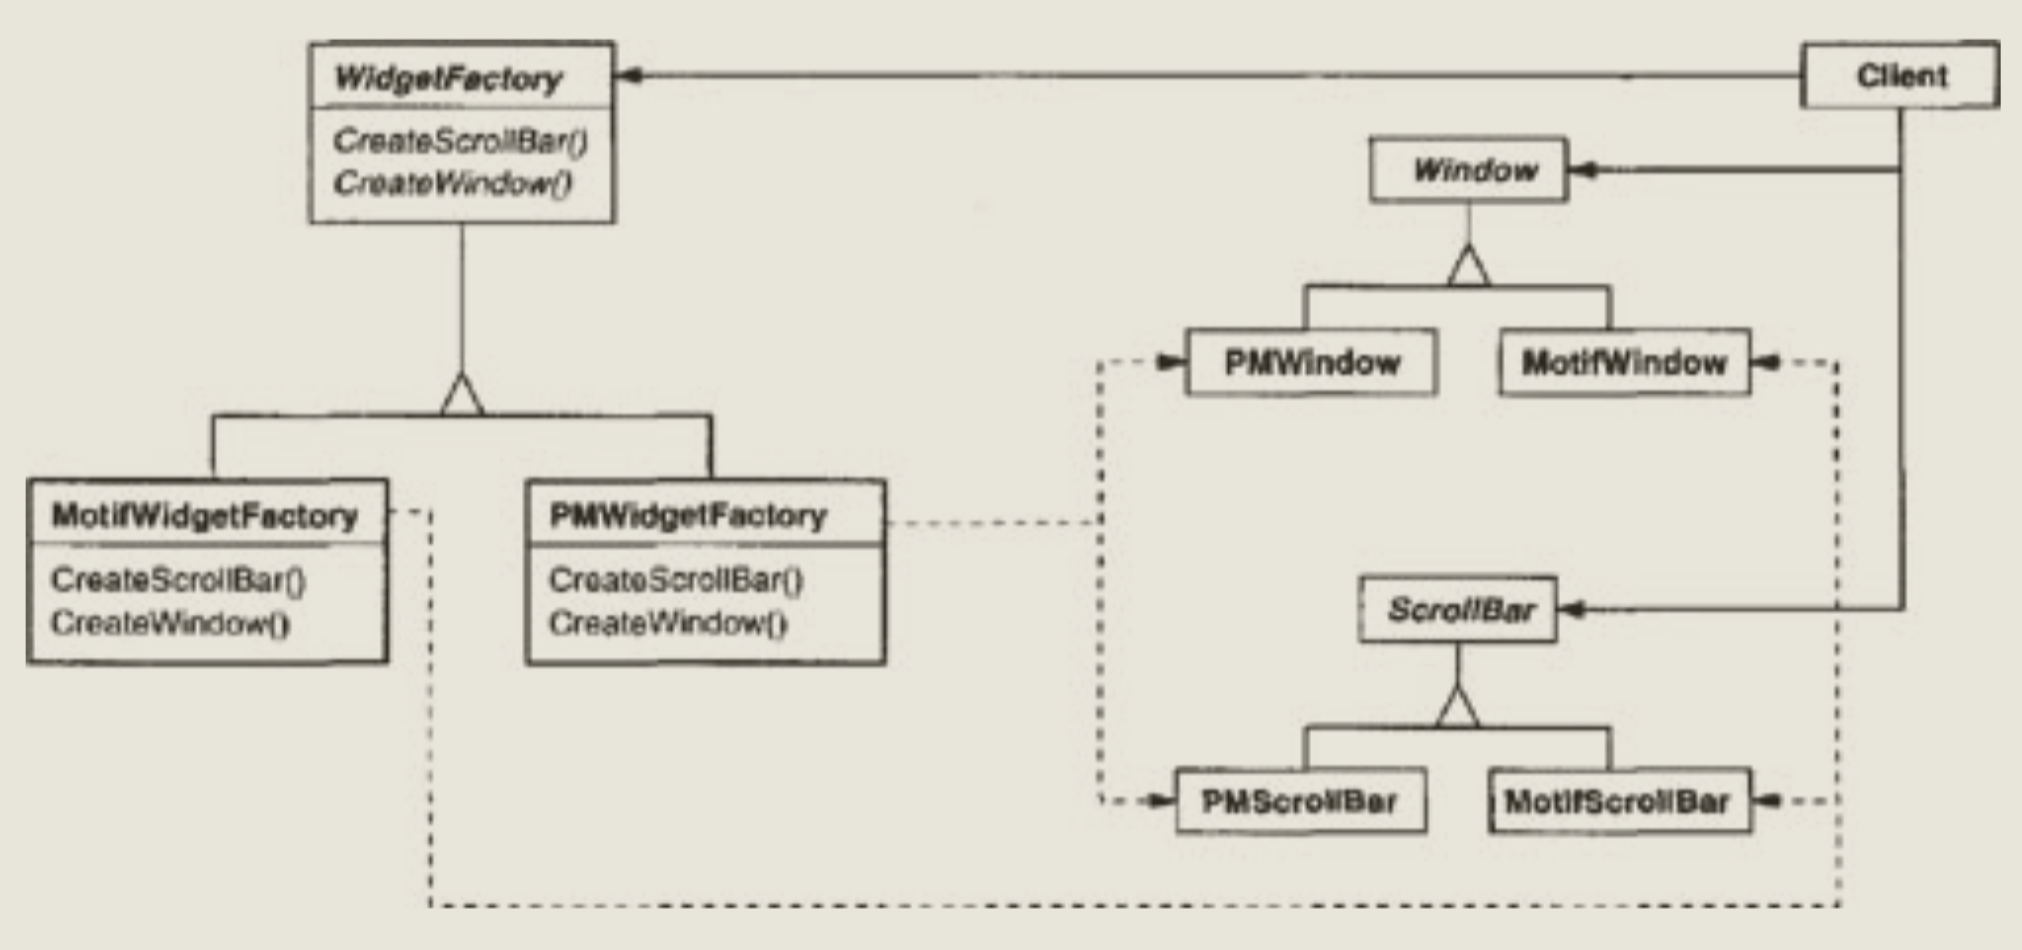
</div>

In [7]:
# without factory method

class DETranslate:
    def __init__(self) -> None:
        self.translation = {"car": "Auto", "bike": "Rad"}
        
    def localize(self, word: str) -> str:
        return self.translation.get(word, word)
    
class FRTranslate:
    def __init__(self) -> None:
        self.translation = {"car": "voiture", "bike": "bicyclette"}
        
    def localize(self, word: str) -> str:
        return self.translation.get(word, word)
    
class ENTranslate:
    def localize(self, word: str) -> str:
        return word
    
de = DETranslate()
fr = FRTranslate()
en = ENTranslate()

words = ["bike", "car"]

for word in words:
    print(de.localize(word))
    print(fr.localize(word))    
    print(en.localize(word))    

Rad
bicyclette
bike
Auto
voiture
car


In [8]:
# with factory method

class DETranslate:
    def __init__(self) -> None:
        self.translations = {"car": "Auto", "bike": "Rad"}
        
    def localize(self, word: str) -> str:
        return self.translations.get(word, word)
    
class FRTranslate:
    def __init__(self) -> None:
        self.translation = {"car": "voiture", "bike": "bicyclette"}
        
    def localize(self, word: str) -> str:
        return self.translation.get(word, word)
    
class ENTranslate:
    def localize(self, word: str) -> str:
        return word
    

def Factory(language: str="English") -> Callable:
    """factory method"""
    localizers = {"German": DETranslate,
                 "French": FRTranslate,
                 "English": ENTranslate}
    return localizers[language]()

fr = Factory("French")
de = Factory("German")
en = Factory("English")

words = ["bike", "car"]

for word in words:
    print(fr.localize(word))
    print(de.localize(word))    
    print(en.localize(word))    

bicyclette
Rad
bike
voiture
Auto
car


## strategy

<div class="alert alert-block alert-info">
    <li>is a behavioural design pattern</li>
    <li>defines a family of algorithms, encapsulate each one, and make them interchangeable</li>
    <li>strategy lets the algorithm vary independently from clients that use it</li>
    <li>enables selecting an algorithm at runtime</li>
</div>

<div>
    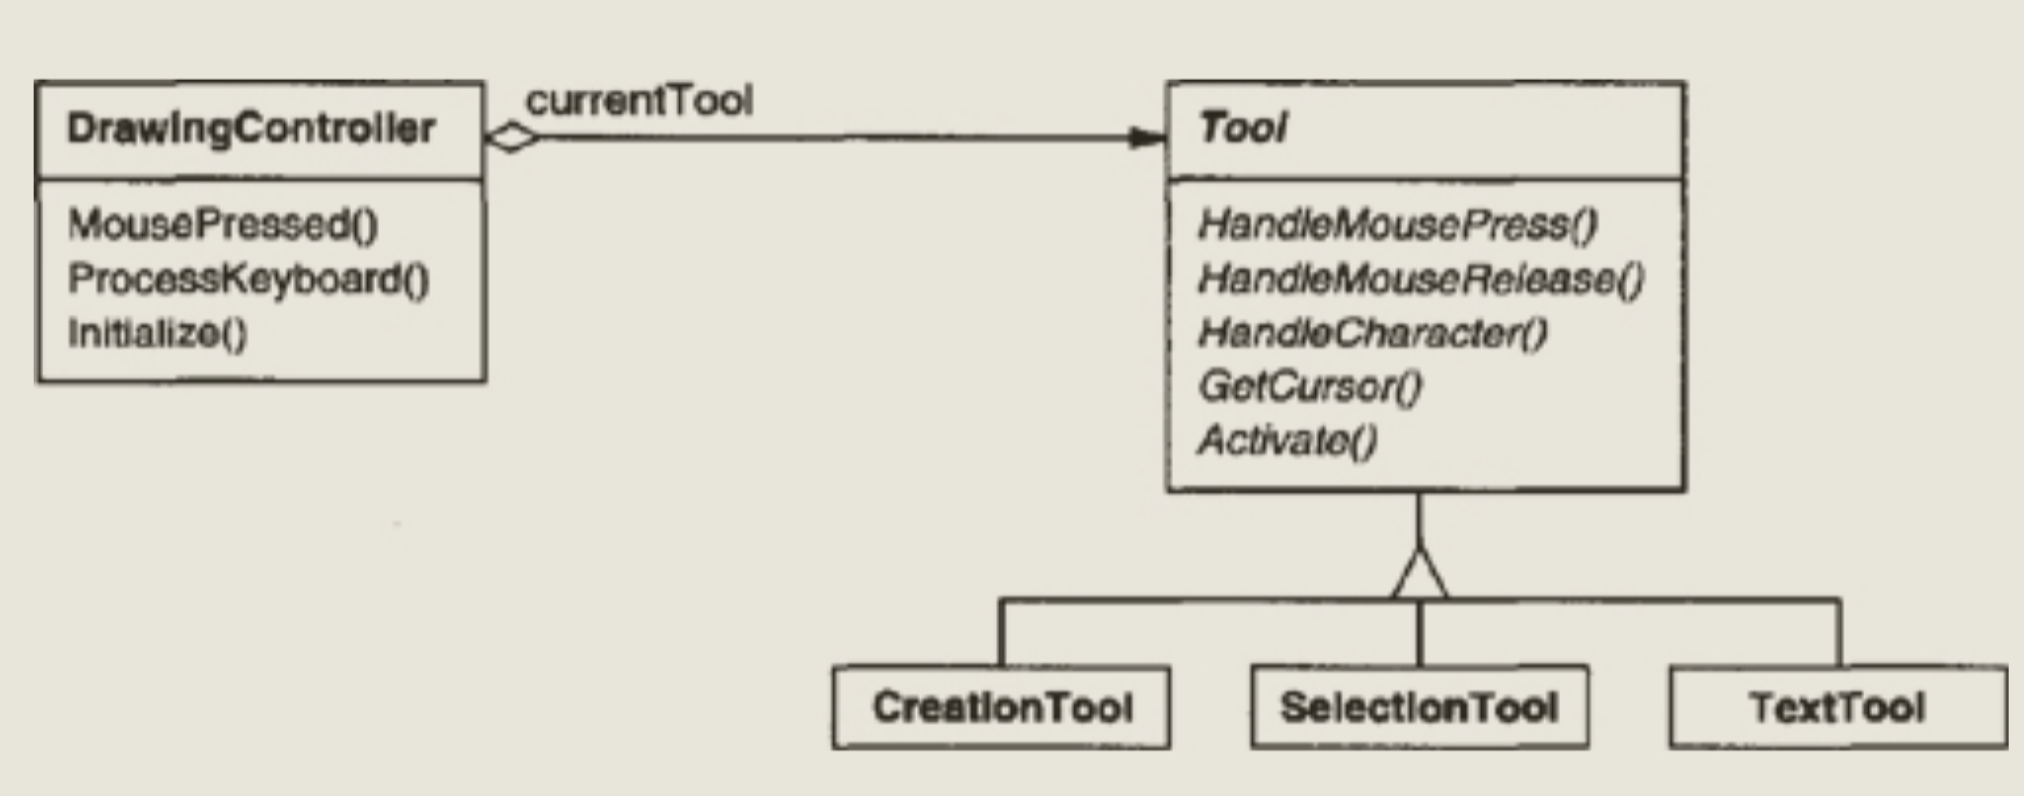
</div>

In [5]:
# TODO fix types line 5, 20, 23 (mypy) ?????
from typing import Callable, Optional

class Part:
    def __init__(self, price: float, strategy: Optional[Callable[['Part'], float]] = None) -> None:
        self.price = price
        self.strategy = strategy
        
    def price_after_discount(self) -> float:
        if self.strategy:
            discount = self.strategy(self)
        else:
            discount = 0
        return self.price - discount
        
    def __repr__(self) -> str:
        statement = "Price: {}, price after discount: {}"
        return statement.format(self.price, self.price_after_discount())
    
def on_sale_discount(order: 'Part') -> float:
    return order.price * 0.75

def ten_percent_discount(order: 'Part') -> float:
    return order.price * 0.10


print(Part(20000.))
print(Part(20000., strategy = ten_percent_discount))
print(Part(20000., strategy = on_sale_discount))

Price: 20000.0, price after discount: 20000.0
Price: 20000.0, price after discount: 18000.0
Price: 20000.0, price after discount: 5000.0


In [5]:
from dataclasses import dataclass

@dataclass
class OrderValue:
    base_price: float
    price_after_discount: float
    price_after_coupon: float
        
        
class Order:
    def price(self, base_price: float, discount: float, coupon_value: float) -> float:
        return ComputePrice(base_price, discount, coupon_value).compute()
    
    
class ComputePrice:
    def __init__(self, base_price: float, discount: float, coupon_value: float) -> None:
        self.base_price = base_price
        self.discount = discount
        self.coupon_value = coupon_value
        
    def compute(self) -> OrderValue:
        price_after_discount = self.base_price * (1 - self.discount)
        price_after_coupon = price_after_discount - self.coupon_value
        return OrderValue(base_price=self.base_price, 
                          price_after_discount=price_after_discount, 
                          price_after_coupon=price_after_coupon)
    
order = Order()
order.price(20000, 0.1, 20)

OrderValue(base_price=20000, price_after_discount=18000.0, price_after_coupon=17980.0)